In [1]:
#import the required libraries
import os
import csv
import requests
import json as json
import pandas as pd
from pandas.io.json import json_normalize
import datetime
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns


## The following are api calls that provide some useful information

In [ ]:
#Counts the number of books from 11/1/2019. Over 1.4 million
https://data.seattle.gov/resource/6vkj-f5xf.json?$select=count(BibNum)&reportdate=2019-11-01T00:00:00.000
#get list of neighborhoods
https://data.seattle.gov/resource/6vkj-f5xf.json?$query=select distinct ItemLocation
#See number by a neightborhood
https://data.seattle.gov/resource/6vkj-f5xf.json?$select=count(BibNum)&ItemLocation=cen
#I think we need: col, mon, qna, GWD or gwd? (I think gwd), nga, uni AND net, mgm (Madrona Sally Goaldman for central).
#None in Laurelhusrt
#This returns counts by location:
https://data.seattle.gov/resource/6vkj-f5xf.json?$select=ItemLocation,count(BibNum)&$group=ItemLocation

#Not sure if this works    
https://data.seattle.gov/resource/6vkj-f5xf.json?$query=select count(BibNum) where ItemLocation=col OR ItemLocation=mon
    
    

## Open json file

In [5]:
#Open up the same file for reading
with open("SPL-bibCOUNTS-May2019.json", "r") as read_file: #Replace this with the filename of your choice
    jmay = json.load(read_file)
with open("SPL-bibCOUNTS-July2019.json", "r") as read_file: #Replace this with the filename of your choice
    jjuly = json.load(read_file)
count=len(d)

## Get the number of books in branches
col, mon, qna, GWD or gwd? (I think gwd), nga, uni AND net, mgm (Madrona Sally Goaldman for central).
None in Laurelhusrt

In [2]:
#This gets the recent ones for the neighborhoods and the date
coldate1 = '"2019-05-01T00:00:00.000"'
coldate2 = '"2019-07-01T00:00:00.000"'
may=requests.get('https://data.seattle.gov/resource/6vkj-f5xf.json?$select=ItemLocation,count(BibNum)&$where=reportdate='+coldate1+'&$group=ItemLocation') #build string according to SOCRATA's convention to get public data assets
july=requests.get('https://data.seattle.gov/resource/6vkj-f5xf.json?$select=ItemLocation,count(BibNum)&$where=reportdate='+coldate2+'&$group=ItemLocation') #build string according to SOCRATA's convention to get public data assets

#THis one gets all:
#r=requests.get('https://data.seattle.gov/resource/6vkj-f5xf.json?$select=ItemLocation,count(BibNum)&$group=ItemLocation') #build string according to SOCRATA's convention to get public data assets
jmay=json.loads(may.text) #parse the json into a list
jjuly=json.loads(july.text) #parse the json into a list


In [3]:
test = jmay +jjuly
print(len(test))
print(len(jmay))
print(len(jjuly))

65
33
32


In [11]:
#jmay[0]
jjuly[0]


{'ItemLocation': 'col', 'count_BibNum': '32701'}

## Save the json files

In [4]:
with open('SPL-bibCOUNTS-May2019.json', "w") as write_file:
    json.dump(jmay, write_file)
with open('SPL-bibCOUNTS-July2019.json', "w") as write_file:
    json.dump(jjuly, write_file)

## Get the count of books in your branches


In [5]:
#col, mon, qna, GWD or gwd? (I think gwd), nga, uni AND net, mgm
mayhoods = jmay #create a json file to mess with
julyhoods = jjuly

branches1=[] #dim list as a empty list

for c in mayhoods:  #d is the dictionary of parsed json
        if c['ItemLocation']=='col':
            branches1.append(c['count_BibNum'])
        if c['ItemLocation']=='mgm':
            branches1.append(c['count_BibNum'])
        if c['ItemLocation']=='qna':
            branches1.append(c['count_BibNum'])
        if c['ItemLocation']=='gwd':
            branches1.append(c['count_BibNum'])
        if c['ItemLocation']=='nga':
            branches1.append(c['count_BibNum'])

            
branches2=[] #dim list as a empty list

for c in julyhoods:  #d is the dictionary of parsed json
        if c['ItemLocation']=='uni':
            branches2.append(c['count_BibNum'])
        if c['ItemLocation']=='net':
            branches2.append(c['count_BibNum'])
        if c['ItemLocation']=='mon':
            branches2.append(c['count_BibNum'])

print("List built:", len(branches1),"elements") #print how many elements are in lists
print("List built:", len(branches2),"elements")

List built: 5 elements
List built: 3 elements


In [6]:
#Convert the dictionary to a dataframe
bibctsmay = pd.DataFrame(branches1, columns=['bibcount'])
bibctsmay = pd.to_numeric(bibctsmay['bibcount'])

bibctsjuly = pd.DataFrame(branches2, columns=['bibcount'])
bibctsjuly = pd.to_numeric(bibctsjuly['bibcount'])

print(bibctsmay.head(10))
print(bibctsjuly.head(10))


0    31488
1    34276
2    23893
3    51710
4    10226
Name: bibcount, dtype: int64
0    16425
1    30166
2    60672
Name: bibcount, dtype: int64


In [7]:
maybooks=bibctsmay.sum()
julybooks=bibctsjuly.sum()
print(maybooks)
print(julybooks)

151593
107263


# Retrieve Recent Records

## Open previous json if alread gathered

In [2]:
#Open up the  for reading
with open("SPL-Study-Data.json", "r") as read_file: #Replace this with the filename of your choice
    l = json.load(read_file)
count=len(l)
count

262112

## Collect the data

In [11]:
#col, mon, qna, GWD or gwd? (I think gwd), nga, uni AND net, mgm
#This works in browser: https://data.seattle.gov/resource/6vkj-f5xf.json?$where=ItemLocation= 'col' or ItemLocation='mon' or ItemLocation='qna' or ItemLocation='gwd' or ItemLocation='mgm' or ItemLocation='nga' or ItemLocation='uni' or ItemLocation='net' and reportdate='2019-11-01T00:00:00.000'&$limit=
#This gets the recent ones and limits the number to what was calculated above
s=requests.get('https://data.seattle.gov/resource/6vkj-f5xf.json?$where=ItemLocation= "col" and reportdate="2019-05-01T00:00:00.000" or ItemLocation="qna" and reportdate="2019-05-01T00:00:00.000" or ItemLocation="gwd" and reportdate="2019-05-01T00:00:00.000" or ItemLocation="mgm" and reportdate="2019-05-01T00:00:00.000" or ItemLocation="nga" and reportdate="2019-05-01T00:00:00.000"&$limit='+str(maybooks)) #build string according to SOCRATA's convention to get public data assets
t=requests.get('https://data.seattle.gov/resource/6vkj-f5xf.json?$where=ItemLocation= "mon" and reportdate="2019-07-01T00:00:00.000" or ItemLocation="uni" and reportdate="2019-07-01T00:00:00.000" or ItemLocation="net" and reportdate="2019-07-01T00:00:00.000"&$limit='+str(julybooks)) #build string according to SOCRATA's convention to get public data assets

#Check this: https://stackoverflow.com/questions/42078161/python-appending-json-object-to-exisiting-json-object

#THis one gets all:
#r=requests.get('https://data.seattle.gov/resource/6vkj-f5xf.json?$select=ItemLocation,count(BibNum)&$group=ItemLocation') #build string according to SOCRATA's convention to get public data assets


l=json.loads(s.text)
m=json.loads(t.text)
alldata= l + m
print(len(alldata))


258856


## Save the json file

In [12]:
with open('SPL-Study-Data.json', "w") as write_file:
    json.dump(alldata, write_file)

# Create CSV
dataframe is df

In [16]:
#Open a csv if already exists:
df = pd.read_csv('SPL-Study-Data.csv',encoding='utf-8')

In [20]:
metadata=open('SPL-Study-Data.csv', 'w', newline='', encoding='utf-8')
csv.writer(metadata).writerow(['bibnum','title','author','isbn','publicationyear','itemtype','itemcollection','itemlocation'])

for i in alldata:
    csv.writer(metadata).writerow([i['bibnum'],
        i.get('title'),
        i.get('author'),
        i.get('isbn'),
        i.get('publicationyear'),
        i.get('itemtype'),
        i['itemcollection'],
        i['itemlocation']])
       # i['reportdate']])                                   
        #i.get('isbn'), #For any of these .get(), adding ",'N/A'" will fill the null cells with 'N/A'. However, metadata assessment counts non nulls
                                   

metadata.close() #Close the output file, release all locks

#Open up the same file as a dataframe. Encode cp1252 avoids a utf-8 error.  But here cp1252 produces an error!
df = pd.read_csv('SPL-Study-Data.csv',encoding='utf-8')

print('The resulting dataframe has',len(df),'rows')

The resulting dataframe has 258856 rows


In [21]:
df.head(1)

,bibnum,title,author,isbn,publicationyear,itemtype,itemcollection,itemlocation
0,3438420,Rick Steves Portugal.,"Steves, Rick, 1955-","1641710969, 9781641710961",2019.,acbk,nanf,qna


## Open data dictionary file to map fiction/nonfiction and media type

In [22]:
dftype = pd.read_csv('SPL-datadict-type.csv',encoding='utf-8')
dftype.head(2)

,itemtype,format
0,acart,Art
1,acphoto,Art


In [23]:
#Create a new dataframe with the data dictionary info. Inner join is intersection so removes rows with no partner in other dataframe
dfall = pd.merge(df, dftype, on='itemtype', how='inner')

In [24]:
dfcol = pd.read_csv('SPL-datadict-collection.csv',encoding='utf-8')
dfcol.head(2)

,itemcollection,type
0,ncenf,Nonfiction
1,cabob,NaN


In [25]:
#Create a new dataframe with the data dictionary info. Inner join is intersection so removes rows with no partner in other dataframe
dfall = pd.merge(dfall, dfcol, on='itemcollection', how='inner')

In [26]:
dfall.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 258856 entries, 0 to 258855
Data columns (total 10 columns):
bibnum             258856 non-null int64
title              258854 non-null object
author             221451 non-null object
isbn               227553 non-null object
publicationyear    258628 non-null object
itemtype           258856 non-null object
itemcollection     258856 non-null object
itemlocation       258856 non-null object
format             258836 non-null object
type               257921 non-null object
dtypes: int64(1), object(9)
memory usage: 21.7+ MB


## Pare down to books

In [27]:
dfbook = dfall.loc[dfall['format']=='Book']


In [28]:
dfbook.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 211677 entries, 0 to 258821
Data columns (total 10 columns):
bibnum             211677 non-null int64
title              211677 non-null object
author             202782 non-null object
isbn               210974 non-null object
publicationyear    211505 non-null object
itemtype           211677 non-null object
itemcollection     211677 non-null object
itemlocation       211677 non-null object
format             211677 non-null object
type               211290 non-null object
dtypes: int64(1), object(9)
memory usage: 17.8+ MB


## Add neighborhood column

In [29]:
dfhood = pd.read_csv('neighborhoods.csv',encoding='utf-8')
dfhood.head(2)

,itemlocation,neighborhood,count
0,col,Columbia City,1
1,mon,Montlake,1


In [30]:
#Create a new dataframe with the data dictionary info. Inner join is intersection so removes rows with no partner in other dataframe
dfbook = pd.merge(dfbook, dfhood, on='itemlocation', how='inner')
dfbook.head()

,bibnum,title,author,isbn,publicationyear,itemtype,itemcollection,itemlocation,format,type,neighborhood,count
0,3438420,Rick Steves Portugal.,"Steves, Rick, 1955-","1641710969, 9781641710961",2019.,acbk,nanf,qna,Book,Nonfiction,Queen Anne,1
1,3170817,Design your life : creating success through pe...,"Roy, Rachel","0062405128, 9780062405128",[2016],acbk,nanf,qna,Book,Nonfiction,Queen Anne,1
2,3270147,It takes one to tango : how I rescued my marri...,"Reilly, Winifred M.","1501125826, 9781501125829",2017.,acbk,nanf,qna,Book,Nonfiction,Queen Anne,1
3,3062179,Sapiens : a brief history of humankind / Yuval...,"Harari, Yuval N.","0062316095, 0062316117, 9780062316097, 9780062...",2015.,acbk,nanf,qna,Book,Nonfiction,Queen Anne,1
4,2753495,After Henry / Joan Didion.,"Didion, Joan","0679745394, 9780679745396",1993.,acbk,nanf,qna,Book,Nonfiction,Queen Anne,1


# Start Analysis
on dataframe dbook

In [13]:
#Open a previous CSV THEN SKIP TO ANALYSIS
dfbook = pd.read_csv('SPL-dfbook.csv',encoding='utf-8')

In [31]:
#Get a csv of the unique year values to look at problem values
dfyears = dfbook.publicationyear.unique()
dfyears = pd.DataFrame(dfyears)
dfyears.to_csv('SPLyears.csv', mode = 'w', index=False)

In [32]:
#Make sure all values are string (?) then get rid of all '[c', 'Â©' and then the rest of the brackets 
dfbook['publicationyear']= dfbook['publicationyear'].astype(str)
dfbook['publicationyear'] =  dfbook['publicationyear'].apply(lambda x: x.replace('[c',''),'')
#dfbook['publicationyear'] =  dfbook['publicationyear'].apply(lambda x: x.replace('Â©',''),'')
dfbook['publicationyear'] =  dfbook['publicationyear'].apply(lambda x: x.replace('[','').replace(']','')) 
#dfbook['publicationyear'] = preg_replace("/(©|&copy;|&#169;)/", "", dfbook['publicationyear'])
#dfbook['publicationyear'] = str_replace(array('©'), array(''), dfbook['publicationyear'])

In [43]:
#Create csv file to look at what date problems are left
#The cleaning seems to do a very good job.  Any blanks appear to be blank at SPL too.
dfbook.to_csv('SPL-book-data-cleaned.csv', mode = 'w', index=False)

In [33]:
#The year values are very difficult- lots of non numeric characters.
#Use: https://realpython.com/python-data-cleaning-numpy-pandas/#combining-str-methods-with-numpy-to-clean-columns

#reg expression: r'^(\d{4})'  This takes the first four numeric digits.  Everything else goes to NaN
extr = dfbook['publicationyear'].str.extract(r'^(\d{4})', expand=False)
extr.head()

0    2019
1    2016
2    2017
3    2015
4    1993
Name: publicationyear, dtype: object

In [34]:
#Convert to numeric and show datatype
dfbook['publicationyear'] = pd.to_numeric(extr)
dfbook['publicationyear'].dtype

dtype('float64')

In [35]:
#What percent are Nan?
dfbook['publicationyear'].isnull().sum() / len(dfbook)

0.018920336172564806

## Histogram of years

In [36]:
#Open LFL year data
lflyear = pd.read_csv('LFL-books-years.csv',encoding='utf-8')

In [37]:
#Set up a dataset with years going back as far as LFLs
dfbookyr = dfbook.loc[dfbook['publicationyear']>1927]
print(len(dfbookyr))
dfbookyr.head()

207661


,bibnum,title,author,isbn,publicationyear,itemtype,itemcollection,itemlocation,format,type,neighborhood,count
0,3438420,Rick Steves Portugal.,"Steves, Rick, 1955-","1641710969, 9781641710961",2019.0,acbk,nanf,qna,Book,Nonfiction,Queen Anne,1
1,3170817,Design your life : creating success through pe...,"Roy, Rachel","0062405128, 9780062405128",2016.0,acbk,nanf,qna,Book,Nonfiction,Queen Anne,1
2,3270147,It takes one to tango : how I rescued my marri...,"Reilly, Winifred M.","1501125826, 9781501125829",2017.0,acbk,nanf,qna,Book,Nonfiction,Queen Anne,1
3,3062179,Sapiens : a brief history of humankind / Yuval...,"Harari, Yuval N.","0062316095, 0062316117, 9780062316097, 9780062...",2015.0,acbk,nanf,qna,Book,Nonfiction,Queen Anne,1
4,2753495,After Henry / Joan Didion.,"Didion, Joan","0679745394, 9780679745396",1993.0,acbk,nanf,qna,Book,Nonfiction,Queen Anne,1


(1900, 2020)

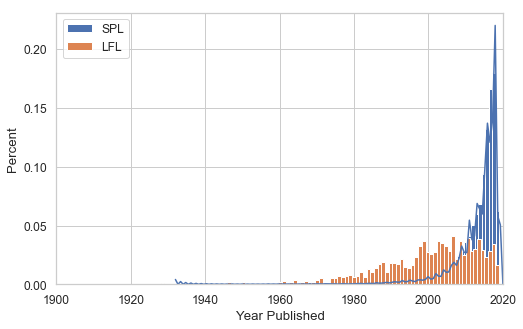

In [38]:
#'Density' Histogram of year published using mtlabplot (change kde to false for counts, or to get rid of gaussian line, change norm_hist to True)
#yrhist = bks['yrpub'].plot.hist(bins=50)
#Same thing using seaborn
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})

#SPL
p1= sns.distplot(
    dfbookyr['publicationyear'], norm_hist=False, kde=True, bins=92, hist_kws={"alpha": 1}).set(xlabel='Year Published', ylabel='Percent')
#LFL
p1= sns.distplot(
    lflyear['yrpub'], norm_hist=True, kde=False, bins=92, hist_kws={"alpha": 1}).set(xlabel='Year Published', ylabel='Percent')

plt.legend(labels=['SPL','LFL'])
plt.xlim(1900, 2020)

C:\Users\Andre\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Andre\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Year Published')]

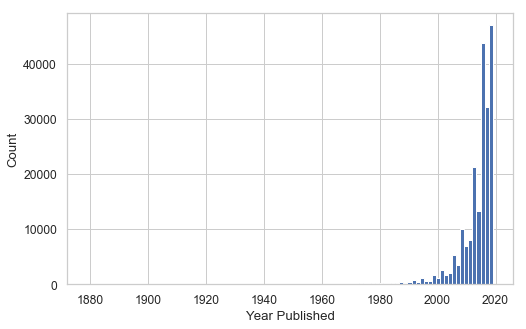

In [39]:
#Histogram of year published using mtlabplot
#yrhist = bks['yrpub'].plot.hist(bins=50)
#Same thing using seaborn
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    dfbook['publicationyear'], norm_hist=False, kde=False, bins=100, hist_kws={"alpha": 1}
).set(xlabel='Year Published', ylabel='Count')

# Set up a dataframe with SPL data by neighborhood
fiction/nonfiction, percent childrens, There is no Laurelhurst branch!!

In [40]:
dfbook.type.unique()

array(['Nonfiction', 'Fiction', 'Reference', 'Language', nan],
      dtype=object)

In [41]:
#Set up a dataframe with the percent fiction

#Groups count by Neighborhood, and type, calculates percent
bksfiction = dfbook.groupby(['neighborhood', 'type'])['count'].sum().reset_index() #total of each category
bksfiction['total'] = bksfiction.groupby('neighborhood')['count'].transform('sum') #Inserts total count for the neighborhood for each type in each neighborhood 
bksfiction['percent'] = bksfiction['count']/bksfiction['total']


#Select fiction
fic = bksfiction.loc[bksfiction['type']=='Fiction']
fic.head(8)

,neighborhood,type,count,total,percent
0,Central District,Fiction,5485,7809,0.702395
3,Columbia City,Fiction,14870,26486,0.561429
7,Montlake,Fiction,7731,13001,0.594647
10,Northgate,Fiction,16174,27569,0.586673
14,Phinney-Greenwood,Fiction,22772,42934,0.530395
18,Queen Anne,Fiction,10197,18491,0.551457
22,Ravenna,Fiction,42233,75000,0.563107


In [44]:
fictionbks = fic['count'].sum()
totalbks = fic['total'].sum()
perfic = fictionbks/totalbks
print(perfic)

0.5653935349519618


In [42]:
#Save csv file for further testing: 
dfbook.to_csv('SPL-dfbook.csv', mode = 'w', index=False)